In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
#!pip install bs4
#!pip install requests

#from bs4 import BeautifulSoup # this module helps in web scrapping.
#import requests  # this module helps us to download a web page
#print ('BeautifulSoup & requests are imported')

In [3]:
CLIENT_ID = 'UZVMMUMAH2ZUQTDAVHZTSWDDYUH02SBQYMU2PJFBUKAHIDPD' # your Foursquare ID
CLIENT_SECRET = 'GPVZSUBMD5KM04WFIB54YUVDRXQKJAD4ESZGZOD0SKAKIG5J' # your Foursquare Secret
ACCESS_TOKEN = 'GGIZF21FR5DLPPVETUEE554C0E2RUGWKX4ULFW1IZ00LE0HS' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100 # A default Foursquare API limit value
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UZVMMUMAH2ZUQTDAVHZTSWDDYUH02SBQYMU2PJFBUKAHIDPD
CLIENT_SECRET:GPVZSUBMD5KM04WFIB54YUVDRXQKJAD4ESZGZOD0SKAKIG5J


In [4]:
Davis_latitude = 38.54491
Davis_longitude = -121.74052
print(Davis_latitude, Davis_longitude)

38.54491 -121.74052


In [5]:
search_query = 'park'
radius = 12000
print(search_query + ' .... OK!')

park .... OK!


In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, Davis_latitude, Davis_longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=UZVMMUMAH2ZUQTDAVHZTSWDDYUH02SBQYMU2PJFBUKAHIDPD&client_secret=GPVZSUBMD5KM04WFIB54YUVDRXQKJAD4ESZGZOD0SKAKIG5J&ll=38.54491,-121.74052&oauth_token=GGIZF21FR5DLPPVETUEE554C0E2RUGWKX4ULFW1IZ00LE0HS&v=20180604&query=park&radius=12000&limit=100'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '610c28be56101b1b470eaf68'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4b6ee64ff964a520d5cf2ce3',
    'name': 'Central Park',
    'location': {'address': '5th St',
     'crossStreet': 'at B St',
     'lat': 38.54540172198655,
     'lng': -121.74449987580289,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.54540172198655,
       'lng': -121.74449987580289}],
     'distance': 350,
     'postalCode': '95616',
     'cc': 'US',
     'city': 'Davis',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['5th St (at B St)', 'Davis, CA 95616']},
    'categories': [{'id': '4bf58dd8d48988d163941735',
      'name': 'Park',
      'pluralName': 'Parks',
      'shortName': 'Park',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1628186814',
    'ha

In [8]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b6ee64ff964a520d5cf2ce3,Central Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1628186814,False,5th St,at B St,38.545402,-121.744500,"[{'label': 'display', 'lat': 38.54540172198655...",350,95616,US,Davis,CA,United States,"[5th St (at B St), Davis, CA 95616]",NaN,NaN
1,54d07b3d498ebe5a03ecc3aa,North Park Theatre,[],v-1628186814,False,NaN,NaN,38.544907,-121.740517,"[{'label': 'display', 'lat': 38.5449065, 'lng'...",0,NaN,US,Davis,CA,United States,"[Davis, CA]",NaN,NaN
2,4b0586b2f964a5203a6a22e3,University Park Inn and Suites,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1628186814,False,1111 Richards Blvd,NaN,38.539922,-121.738301,"[{'label': 'display', 'lat': 38.539922, 'lng':...",587,95616,US,Davis,CA,United States,"[1111 Richards Blvd, Davis, CA 95616]",NaN,NaN
3,4c9121be9d5cbfb7c0f89b1d,Solano Park Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1628186814,False,4400 Solano Park Cir,Arboretum Dr,38.539588,-121.743323,"[{'label': 'display', 'lat': 38.53958778940289...",640,95616,US,Davis,CA,United States,"[4400 Solano Park Cir (Arboretum Dr), Davis, C...",NaN,NaN
4,4cac026536fa6dcb392cdb78,Russell Park Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1628186814,False,400 Russell Park,NaN,38.545467,-121.763692,"[{'label': 'display', 'lat': 38.54546719973586...",2018,95616,US,Davis,CA,United States,"[400 Russell Park, Davis, CA 95616]",NaN,NaN


In [9]:
dataframe.shape

(50, 19)

In [10]:
# dataframe[dataframe.id != '4c24c96fa852c92806a7e36c']
dataframe.drop(dataframe[dataframe['name'] == 'Park Avenue Turf, Inc.'].index, inplace = True)
dataframe.reset_index(drop=True, inplace=True)

In [11]:
dataframe.shape

(49, 19)

In [12]:
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b6ee64ff964a520d5cf2ce3,Central Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1628186814,False,5th St,at B St,38.545402,-121.744500,"[{'label': 'display', 'lat': 38.54540172198655...",350,95616,US,Davis,CA,United States,"[5th St (at B St), Davis, CA 95616]",NaN,NaN
1,54d07b3d498ebe5a03ecc3aa,North Park Theatre,[],v-1628186814,False,NaN,NaN,38.544907,-121.740517,"[{'label': 'display', 'lat': 38.5449065, 'lng'...",0,NaN,US,Davis,CA,United States,"[Davis, CA]",NaN,NaN
2,4b0586b2f964a5203a6a22e3,University Park Inn and Suites,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1628186814,False,1111 Richards Blvd,NaN,38.539922,-121.738301,"[{'label': 'display', 'lat': 38.539922, 'lng':...",587,95616,US,Davis,CA,United States,"[1111 Richards Blvd, Davis, CA 95616]",NaN,NaN
3,4c9121be9d5cbfb7c0f89b1d,Solano Park Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1628186814,False,4400 Solano Park Cir,Arboretum Dr,38.539588,-121.743323,"[{'label': 'display', 'lat': 38.53958778940289...",640,95616,US,Davis,CA,United States,"[4400 Solano Park Cir (Arboretum Dr), Davis, C...",NaN,NaN
4,4cac026536fa6dcb392cdb78,Russell Park Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1628186814,False,400 Russell Park,NaN,38.545467,-121.763692,"[{'label': 'display', 'lat': 38.54546719973586...",2018,95616,US,Davis,CA,United States,"[400 Russell Park, Davis, CA 95616]",NaN,NaN


In [13]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Central Park,Park,5th St,at B St,38.545402,-121.744500,"[{'label': 'display', 'lat': 38.54540172198655...",350,95616,US,Davis,CA,United States,"[5th St (at B St), Davis, CA 95616]",NaN,4b6ee64ff964a520d5cf2ce3
1,North Park Theatre,None,NaN,NaN,38.544907,-121.740517,"[{'label': 'display', 'lat': 38.5449065, 'lng'...",0,NaN,US,Davis,CA,United States,"[Davis, CA]",NaN,54d07b3d498ebe5a03ecc3aa
2,University Park Inn and Suites,Hotel,1111 Richards Blvd,NaN,38.539922,-121.738301,"[{'label': 'display', 'lat': 38.539922, 'lng':...",587,95616,US,Davis,CA,United States,"[1111 Richards Blvd, Davis, CA 95616]",NaN,4b0586b2f964a5203a6a22e3
3,Solano Park Apartments,Residential Building (Apartment / Condo),4400 Solano Park Cir,Arboretum Dr,38.539588,-121.743323,"[{'label': 'display', 'lat': 38.53958778940289...",640,95616,US,Davis,CA,United States,"[4400 Solano Park Cir (Arboretum Dr), Davis, C...",NaN,4c9121be9d5cbfb7c0f89b1d
4,Russell Park Apartments,Residential Building (Apartment / Condo),400 Russell Park,NaN,38.545467,-121.763692,"[{'label': 'display', 'lat': 38.54546719973586...",2018,95616,US,Davis,CA,United States,"[400 Russell Park, Davis, CA 95616]",NaN,4cac026536fa6dcb392cdb78


In [14]:
venues_map = folium.Map(location=[Davis_latitude, Davis_longitude], zoom_start=13) # generate map of City Davis

# add the parks as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [15]:
subdivisions = dataframe_filtered[['name','lat', 'lng']]
subdivisions.head()

,name,lat,lng
0,Central Park,38.545402,-121.744500
1,North Park Theatre,38.544907,-121.740517
2,University Park Inn and Suites,38.539922,-121.738301
3,Solano Park Apartments,38.539588,-121.743323
4,Russell Park Apartments,38.545467,-121.763692


In [16]:
subdivisions.rename({"name": "Subdivision", "lat": "Latitude", "lng": "Longitude"}, axis=1, inplace=True)
subdivisions.head()

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Subdivision,Latitude,Longitude
0,Central Park,38.545402,-121.744500
1,North Park Theatre,38.544907,-121.740517
2,University Park Inn and Suites,38.539922,-121.738301
3,Solano Park Apartments,38.539588,-121.743323
4,Russell Park Apartments,38.545467,-121.763692


In [17]:
# Four Subway restarants spread evenly in Davis, which are used for dividing Davis into four subdivisions
# have the addesses of the four Subway restarants
#Subway_address = ['1300 E Covell Blvd, Davis, CA', '2014 Lyndell Terrace, Davis, CA', '4748 Chiles Rd, Davis, CA', '757 Russell Blvd, Davis, CA']
#Subway_address = pd.DataFrame(list(zip(Subway_address))) 
#Subway_address.columns = ['address']
#Subway_address

In [18]:
# define the dataframe columns
#column_names = ['Subdivision', 'Latitude', 'Longitude'] 

# instantiate the dataframe
#subdivisions = pd.DataFrame(columns=column_names)

#geolocator = Nominatim(user_agent="foursquare_agent")

#for ind in Subway_address.index:
#   address = Subway_address['address'][ind]
#   location = geolocator.geocode(address)
#   latitude = location.latitude
#   longitude = location.longitude
#   subdivisions = subdivisions.append({'Subdivision': address,
#                                          'Latitude': latitude,
#                                         'Longitude': longitude}, ignore_index=True)
#subdivisions

In [19]:
# Explore subdivionss in Davis
# Let's create a function to repeat the same process to all the subdivisions in Davis

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Subdivision', 
                  'Subdivision Latitude', 
                  'Subdivision Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# to run the above function on each subdivision and create a new dataframe called Davis_venues

Davis_venues = getNearbyVenues(names=subdivisions['Subdivision'],
                                   latitudes=subdivisions['Latitude'],
                                   longitudes=subdivisions['Longitude']
                                  )

Central Park
North Park Theatre
University Park Inn and Suites
Solano Park Apartments
Russell Park Apartments
Orchard Park Greenhouse Facility
Slide Hill Park
Orchard Park Apartments
Oxford Circle Park
Davis Dog Park
Civic Center Park
Westwood Park
Willowcreek Park
Cedar Park
Davis Trailer Park
John Barovetto Park
Aspen Greenbelt/Dinosaur Park
88 Disaster Park
N St Park
Park, Vaughan, Fleming & Dowler LLP
Toad Hollow Dog Park
Chestnut Park
Playfields Park
Dog Play Area at Community Park
Community Park
Walnut Park
The Atriums at La Rue Park
Redwood Park
Redwood Park and Clubhouse
Montgomery Park
Walnut Park Tennis Courts
Russell Park Child Development Center
SP+ Parking
Village Park
Covell City Park
Community Park Dog Park
Renaissance Park Apartments
Pavilion Parking Structure
Sandy Motley Park
Oak Grove Park
Putah Creek Park
Northstar Park
Sycamore Park Overcrossing
Patwin Elem Grassy Park
Quad Parking Structure
Parkside Apartments
Sycamore Park
Parkside
Hacienda Park


In [21]:
Davis_venues.head()

,Subdivision,Subdivision Latitude,Subdivision Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Park,38.545402,-121.7445,Davis Farmers' Market,38.544677,-121.744177,Farmers Market
1,Central Park,38.545402,-121.7445,Burgers and Brew,38.544259,-121.743501,Burger Joint
2,Central Park,38.545402,-121.7445,Crepeville,38.544121,-121.743720,Creperie
3,Central Park,38.545402,-121.7445,Zia's Delicatessen,38.544581,-121.740720,Sandwich Place
4,Central Park,38.545402,-121.7445,Yolo Berry Yogurt,38.544726,-121.743731,Frozen Yogurt Shop


In [22]:
Davis_venues.shape

(1915, 7)

In [23]:
# create map of Davis using latitude and longitude values
map_Davis = folium.Map(location=[Davis_latitude, Davis_longitude], zoom_start=14)

# add markers to map
for lat, lng, sub in zip(Davis_venues['Subdivision Latitude'], Davis_venues['Subdivision Longitude'], Davis_venues['Subdivision']):
    label = '{}'.format(sub)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=12,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Davis)  

#for lat, lng, sub, cat in zip(Davis_venues['Venue Latitude'], Davis_venues['Venue Longitude'], Davis_venues['Subdivision'], Davis_venues['Venue Category']):
#    label = '{}, {}'.format(cat, sub)
#    label = folium.Popup(label, parse_html=True)
#    folium.CircleMarker(
#        [lat, lng],
#        radius=5,
#        popup=label,
#        color='blue',
#        fill=True,
#        fill_color='#3186cc',
#        fill_opacity=0.7,
#        parse_html=False).add_to(map_Davis)    
map_Davis

In [24]:
# To check how many venues were returned for each subdivision

Categorized_venues = Davis_venues.groupby('Subdivision').count()

Categorized_venues


,Subdivision Latitude,Subdivision Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Subdivision,,,,,,
88 Disaster Park,91,91,91,91,91,91
Aspen Greenbelt/Dinosaur Park,17,17,17,17,17,17
Cedar Park,68,68,68,68,68,68
Central Park,81,81,81,81,81,81
Chestnut Park,37,37,37,37,37,37
Civic Center Park,75,75,75,75,75,75
Community Park,17,17,17,17,17,17
Community Park Dog Park,20,20,20,20,20,20
Covell City Park,16,16,16,16,16,16


In [25]:
Categorized_venues.shape

(49, 6)

In [26]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


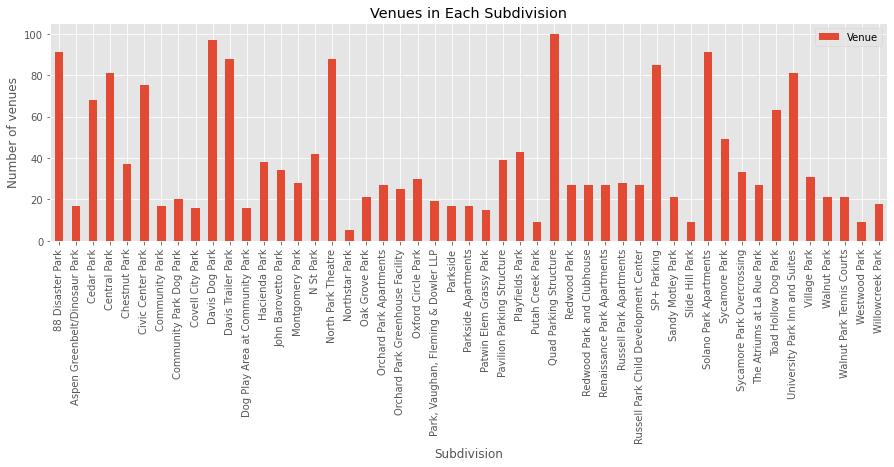

In [27]:
# Categorized_venues.plot.bar(x='Subdivision', y='Venue'
#            color=[(240/255,83/255,101/255), (250/255,188/255,42/255)], # passing normalized RGB colors 
#            figsize=(10,4), # Figsize to make the plot larger
#            title='Venues in Each Subdivision', # Adding a title to the top
#            xlabel="Subdivision", # Adding a label on the xaxis
#            ylabel="# of Venues", # Adding a label on y axis
#            fontsize='large'); # Making my ticks a bit bigger

# Categorized_venues.plot.bar(figsize=(10,4))

Categorized_venues.plot(y='Venue', kind='bar',figsize=(15,4)) 

plt.xlabel('Subdivision') # add to x-label to the plot
plt.ylabel('Number of venues') # add y-label to the plot
plt.title('Venues in Each Subdivision') # add title to the plot

plt.show()

In [28]:
# to find out how many unique categories can be curated from all the returned venue
print('There are {} uniques categories.'.format(len(Davis_venues['Venue Category'].unique())))

There are 146 uniques categories.


In [29]:
# to analyze Each subdivision

# one hot encoding
Davis_onehot = pd.get_dummies(Davis_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Davis_onehot['Subdivision'] = Davis_venues['Subdivision'] 
Davis_onehot.insert(len(Davis_onehot.columns)-1, 'Subdivision', Davis_onehot.pop('Subdivision'))

# move neighborhood column to the first column
fixed_columns = [Davis_onehot.columns[-1]] + list(Davis_onehot.columns[:-1])
Davis_onehot = Davis_onehot[fixed_columns]

Davis_onehot.head()

,Subdivision,ATM,American Restaurant,Andhra Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Climbing Gym,Coffee Shop,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Rec Center,College Soccer Field,College Stadium,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cupcake Shop,Dance Studio,Department Store,Dim Sum Restaurant,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Event Service,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Hobby Shop,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Museum,Music Venue,Newsstand,Noodle House,North Indian Restaurant,Optical Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Shipping Store,Shoe Store,Shopping Plaza,Soccer Field,Spa,Sporting Goods Shop,Sports Club,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Trail,Video Game Store,Video Store,Vineyard,Wings Joint,Yoga Studio
0,Central Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Central Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Central Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Central Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Central Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
Davis_onehot.shape

(1915, 147)

In [31]:
# to group rows by subdivision and by taking the mean of the frequency of occurrence of each category
Davis_grouped = Davis_onehot.groupby('Subdivision').mean().reset_index()
Davis_grouped.head()

,Subdivision,ATM,American Restaurant,Andhra Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Climbing Gym,Coffee Shop,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Rec Center,College Soccer Field,College Stadium,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cupcake Shop,Dance Studio,Department Store,Dim Sum Restaurant,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Event Service,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Hobby Shop,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Museum,Music Venue,Newsstand,Noodle House,North Indian Restaurant,Optical Shop,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Shipping Store,Shoe Store,Shopping Plaza,Soccer Field,Spa,Sporting Goods Shop,Sports Club,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Trail,Video Game Store,Video Store,Vineyard,Wings Joint,Yoga Studio
0,88 Disaster Park,0.021978,0.021978,0.010989,0.0,0.0,0.021978,0.0,0.000000,0.0,0.000000,0.021978,0.021978,0.021978,0.0,0.010989,0.010989,0.000000,0.000000,0.0,0.010989,0.010989,0.0,0.000000,0.021978,0.010989,0.010989,0.0,0.0,0.0,0.032967,0.021978,0.000000,0.076923,0.010989,0.010989,0.0,0.010989,0.0,0.010989,0.0,0.010989,0.0,0.0,0.000000,0.010989,0.000000,0.000000,0.010989,0.010989,0.0,0.0,0.0,0.000000,0.000000,0.010989,0.000000,0.0,0.0,0.010989,0.010989,0.0,0.021978,0.0,0.021978,0.010989,0.021978,0.000000,0.0,0.0,0.000000,0.000000,0.032967,0.0,0.0,0.0,0.0,0.000000,0.010989,0.0,0.0,0.010989,0.032967,0.0,0.021978,0.021978,0.000000,0.0,0.010989,0.0,0.021978,0.0,0.010989,0.000000,0.010989,0.032967,0.010989,0.0,0.0,0.0,0.010989,0.010989,0.0,0.0,0.0,0.010989,0.010989,0.010989,0.021978,0.0,0.0,0.000000,0.0,0.010989,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.021978,0.0,0.0,0.021978,0.0,0.000000,0.0,0.000000,0.021978,0.0,0.0,0.010989,0.000000,0.0,0.010989,0.000000,0.010989,0.021978,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,Aspen Greenbelt/Dinosaur Park,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.058824,0.058824,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.058824,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.058824,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.176471,0.000000,0.000000,0.117647,0.0,0.0,0.058824,0.0,0.000000,0.058824,0.0,0.0

In [32]:
Davis_grouped.shape

(49, 147)

In [33]:
# to print each subdivision along with the top 5 most common venues
num_top_venues = 5

for hood in Davis_grouped['Subdivision']:
    print("----"+hood+"----")
    temp = Davis_grouped[Davis_grouped['Subdivision'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----88 Disaster Park----
                venue  freq
0         Coffee Shop  0.08
1  Mexican Restaurant  0.03
2               Hotel  0.03
3       Grocery Store  0.03
4                Café  0.03


----Aspen Greenbelt/Dinosaur Park----
                                      venue  freq
0                                      Park  0.18
1                               Pizza Place  0.12
2  Residential Building (Apartment / Condo)  0.06
3                            Shopping Plaza  0.06
4                        Mexican Restaurant  0.06


----Cedar Park----
                    venue  freq
0             Pizza Place  0.07
1          Ice Cream Shop  0.06
2      Mexican Restaurant  0.04
3  Thrift / Vintage Store  0.04
4             Coffee Shop  0.04


----Central Park----
                venue  freq
0         Pizza Place  0.07
1         Coffee Shop  0.06
2  Mexican Restaurant  0.05
3      Ice Cream Shop  0.05
4                Café  0.04


----Chestnut Park----
                    venue  freq
0      

In [34]:
# put that into a pandas dataframe
# write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
# to create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Subdivision']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
subdivision_venues_sorted = pd.DataFrame(columns=columns)
subdivision_venues_sorted['Subdivision'] = Davis_grouped['Subdivision']

for ind in np.arange(Davis_grouped.shape[0]):
    subdivision_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Davis_grouped.iloc[ind, :], num_top_venues)

subdivision_venues_sorted.head()

,Subdivision,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,88 Disaster Park,Coffee Shop,Grocery Store,Café,Hotel,Mexican Restaurant,ATM,Bank,Chinese Restaurant,Bubble Tea Shop,Sandwich Place
1,Aspen Greenbelt/Dinosaur Park,Park,Pizza Place,Sandwich Place,Video Store,Shopping Plaza,Brewery,Bubble Tea Shop,Fast Food Restaurant,Mexican Restaurant,Pool
2,Cedar Park,Pizza Place,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Thrift / Vintage Store,Grocery Store,Bakery,Brewery,Chinese Restaurant,Café
3,Central Park,Pizza Place,Coffee Shop,Mexican Restaurant,Ice Cream Shop,Café,Hotel,Sushi Restaurant,Park,Chinese Restaurant,Sandwich Place
4,Chestnut Park,Pizza Place,Yoga Studio,Salon / Barbershop,Liquor Store,Furniture / Home Store,Video Store,Park,Shopping Plaza,Chinese Restaurant,Frozen Yogurt Shop


In [36]:
# Cluster Neighborhoods
# Run k-means to cluster the subdivision into 4 clusters

# set number of clusters
kclusters = 4

Davis_grouped_clustering = Davis_grouped.drop('Subdivision', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Davis_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 3],
      dtype=int32)

In [37]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each subdivision
# add clustering labels
subdivision_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Davis_merged = subdivisions
# Davis_merged.astype({'Cluster Labels': int})
# Davis_merged['Cluster Labels'] = Davis_merged['Cluster Labels'].astype(int)

# merge Davis_grouped with Davis_data to add latitude/longitude for each neighborhood
Davis_merged = Davis_merged.join(subdivision_venues_sorted.set_index('Subdivision'), on='Subdivision')

Davis_merged.head() # check the last columns!

,Subdivision,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Park,38.545402,-121.744500,0,Pizza Place,Coffee Shop,Mexican Restaurant,Ice Cream Shop,Café,Hotel,Sushi Restaurant,Park,Chinese Restaurant,Sandwich Place
1,North Park Theatre,38.544907,-121.740517,0,Coffee Shop,Pizza Place,Hotel,Mexican Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Bakery,Bubble Tea Shop,Burger Joint
2,University Park Inn and Suites,38.539922,-121.738301,0,Hotel,Pizza Place,Coffee Shop,Ice Cream Shop,Café,Chinese Restaurant,Mexican Restaurant,Sushi Restaurant,Bar,Bakery
3,Solano Park Apartments,38.539588,-121.743323,0,Coffee Shop,Pizza Place,Hotel,Ice Cream Shop,Café,Food Truck,Chinese Restaurant,Mexican Restaurant,Bakery,Sandwich Place
4,Russell Park Apartments,38.545467,-121.763692,3,Coffee Shop,Park,Playground,Convenience Store,Japanese Restaurant,ATM,Basketball Court,College Basketball Court,Pharmacy,Restaurant


In [38]:
Davis_merged.astype({'Cluster Labels': int})
Davis_merged.head()

,Subdivision,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Park,38.545402,-121.744500,0,Pizza Place,Coffee Shop,Mexican Restaurant,Ice Cream Shop,Café,Hotel,Sushi Restaurant,Park,Chinese Restaurant,Sandwich Place
1,North Park Theatre,38.544907,-121.740517,0,Coffee Shop,Pizza Place,Hotel,Mexican Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Bakery,Bubble Tea Shop,Burger Joint
2,University Park Inn and Suites,38.539922,-121.738301,0,Hotel,Pizza Place,Coffee Shop,Ice Cream Shop,Café,Chinese Restaurant,Mexican Restaurant,Sushi Restaurant,Bar,Bakery
3,Solano Park Apartments,38.539588,-121.743323,0,Coffee Shop,Pizza Place,Hotel,Ice Cream Shop,Café,Food Truck,Chinese Restaurant,Mexican Restaurant,Bakery,Sandwich Place
4,Russell Park Apartments,38.545467,-121.763692,3,Coffee Shop,Park,Playground,Convenience Store,Japanese Restaurant,ATM,Basketball Court,College Basketball Court,Pharmacy,Restaurant


In [39]:
# visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[Davis_latitude, Davis_longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Davis_merged['Latitude'], Davis_merged['Longitude'], Davis_merged['Subdivision'], Davis_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-3],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
# to examine each cluster and determine the discriminating venue categories that distinguish each cluster
# Cluster #1
Davis_merged.loc[Davis_merged['Cluster Labels'] == 0, Davis_merged.columns[[0] + list(range(1, Davis_merged.shape[1]))]]

,Subdivision,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Park,38.545402,-121.744500,0,Pizza Place,Coffee Shop,Mexican Restaurant,Ice Cream Shop,Café,Hotel,Sushi Restaurant,Park,Chinese Restaurant,Sandwich Place
1,North Park Theatre,38.544907,-121.740517,0,Coffee Shop,Pizza Place,Hotel,Mexican Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Bakery,Bubble Tea Shop,Burger Joint
2,University Park Inn and Suites,38.539922,-121.738301,0,Hotel,Pizza Place,Coffee Shop,Ice Cream Shop,Café,Chinese Restaurant,Mexican Restaurant,Sushi Restaurant,Bar,Bakery
3,Solano Park Apartments,38.539588,-121.743323,0,Coffee Shop,Pizza Place,Hotel,Ice Cream Shop,Café,Food Truck,Chinese Restaurant,Mexican Restaurant,Bakery,Sandwich Place
9,Davis Dog Park,38.545100,-121.736617,0,Pizza Place,Coffee Shop,Hotel,Ice Cream Shop,Mexican Restaurant,Chinese Restaurant,Thrift / Vintage Store,Bubble Tea Shop,Café,Grocery Store
10,Civic Center Park,38.547747,-121.746026,0,Pizza Place,Ice Cream Shop,Coffee Shop,Mexican Restaurant,Café,Chinese Restaurant,Bubble Tea Shop,Bakery,Burger Joint,Sushi Restaurant
12,Willowcreek Park,38.546928,-121.705452,0,Fast Food Restaurant,Pizza Place,Shoe Store,Sushi Restaurant,Big Box Store,Shopping Plaza,Japanese Restaurant,Liquor Store,Post Office,Supermarket
13,Cedar Park,38.550491,-121.736000,0,Pizza Place,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Thrift / Vintage Store,Grocery Store,Bakery,Brewery,Chinese Restaurant,Café
14,Davis Trailer Park,38.544084,-121.731679,0,Coffee Shop,Pizza Place,Ice Cream Shop,Mexican Restaurant,Sushi Restaurant,Chinese Restaurant,Grocery Store,Sandwich Place,Bubble Tea Shop,Café
17,88 Disaster Park,38.546167,-121.751366,0,Coffee Shop,Grocery Store,Café,Hotel,Mexican Restaurant,ATM,Bank,Chinese Restaurant,Bubble Tea Shop,Sandwich Place


In [41]:
# Cluster #2
Davis_merged.loc[Davis_merged['Cluster Labels'] == 1, Davis_merged.columns[[0] + list(range(1, Davis_merged.shape[1]))]]

,Subdivision,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,John Barovetto Park,38.554909,-121.699345,1,Park,Hotel,Fast Food Restaurant,Coffee Shop,Trail,Pizza Place,Sandwich Place,Rental Car Location,Bank,Shopping Plaza
16,Aspen Greenbelt/Dinosaur Park,38.558116,-121.777976,1,Park,Pizza Place,Sandwich Place,Video Store,Shopping Plaza,Brewery,Bubble Tea Shop,Fast Food Restaurant,Mexican Restaurant,Pool
19,"Park, Vaughan, Fleming & Dowler LLP",38.552668,-121.715221,1,Park,Home Service,Gym,Bakery,Automotive Shop,Business Service,Storage Facility,Chinese Restaurant,Sushi Restaurant,Dance Studio
22,Playfields Park,38.544340,-121.724046,1,Gym,Park,Coffee Shop,Hotel,Yoga Studio,Gym Pool,Pet Store,Paper / Office Supplies Store,Bubble Tea Shop,Brewery
25,Walnut Park,38.538357,-121.720558,1,Park,Coffee Shop,Sushi Restaurant,Bubble Tea Shop,Breakfast Spot,Mexican Restaurant,IT Services,Hotel,Salon / Barbershop,Pharmacy
29,Montgomery Park,38.540831,-121.720178,1,Park,Gym,Hotel,Coffee Shop,Brewery,Sandwich Place,Salon / Barbershop,Bubble Tea Shop,Pet Store,Paper / Office Supplies Store
30,Walnut Park Tennis Courts,38.538357,-121.720558,1,Park,Coffee Shop,Sushi Restaurant,Bubble Tea Shop,Breakfast Spot,Mexican Restaurant,IT Services,Hotel,Salon / Barbershop,Pharmacy
33,Village Park,38.543951,-121.715763,1,Park,Gym,Coffee Shop,Sushi Restaurant,Grocery Store,IT Services,Dance Studio,Mexican Restaurant,Paper / Office Supplies Store,Beer Garden
36,Renaissance Park Apartments,38.542430,-121.714570,1,Park,Gym,Coffee Shop,Science Museum,Grocery Store,Gymnastics Gym,Hotel,IT Services,Mexican Restaurant,Paper / Office Supplies Store
41,Northstar Park,38.572263,-121.749664,1,Sculpture Garden,Playground,Park,Trail,Convenience Store,Dance Studio,Cupcake Shop,Creperie,Credit Union,Cosmetics Shop


In [42]:
# Cluster #3
Davis_merged.loc[Davis_merged['Cluster Labels'] == 2, Davis_merged.columns[[0] + list(range(1, Davis_merged.shape[1]))]]

,Subdivision,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Slide Hill Park,38.560850,-121.716649,2,Park,Sushi Restaurant,Pool,Trail,Chinese Restaurant,Dance Studio,Cupcake Shop,Creperie,Credit Union,Cosmetics Shop
11,Westwood Park,38.550911,-121.772789,2,Park,Restaurant,Convenience Store,Italian Restaurant,Pool,College Soccer Field,College Stadium,Comic Shop,Community Center,Concert Hall
40,Putah Creek Park,38.542453,-121.709189,2,Park,Gym,Hotel,Science Museum,Pizza Place,College Stadium,Comic Shop,Community Center,Concert Hall,Construction & Landscaping


In [43]:
# Cluster #4
Davis_merged.loc[Davis_merged['Cluster Labels'] == 3, Davis_merged.columns[[0] + list(range(1, Davis_merged.shape[1]))]]

,Subdivision,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Russell Park Apartments,38.545467,-121.763692,3,Coffee Shop,Park,Playground,Convenience Store,Japanese Restaurant,ATM,Basketball Court,College Basketball Court,Pharmacy,Restaurant
5,Orchard Park Greenhouse Facility,38.544601,-121.763831,3,Coffee Shop,Convenience Store,Japanese Restaurant,ATM,Basketball Court,Park,College Basketball Court,Pharmacy,Playground,Restaurant
7,Orchard Park Apartments,38.544263,-121.765588,3,Coffee Shop,Park,Convenience Store,Japanese Restaurant,ATM,Basketball Court,College Basketball Court,Pharmacy,Playground,Restaurant
8,Oxford Circle Park,38.547458,-121.764967,3,Park,Coffee Shop,Sporting Goods Shop,Playground,Convenience Store,Japanese Restaurant,Gym,Furniture / Home Store,Pool,Pharmacy
26,The Atriums at La Rue Park,38.545499,-121.760935,3,Coffee Shop,Bus Station,Playground,Park,College Soccer Field,Post Office,Pharmacy,College Basketball Court,College Rec Center,Convenience Store
27,Redwood Park,38.553230,-121.759674,3,Grocery Store,Playground,Park,ATM,Concert Hall,Residential Building (Apartment / Condo),Chinese Restaurant,Pizza Place,Pharmacy,Mexican Restaurant
28,Redwood Park and Clubhouse,38.553734,-121.758781,3,Grocery Store,Park,ATM,Mexican Restaurant,Residential Building (Apartment / Condo),Chinese Restaurant,Playground,Pizza Place,Pharmacy,Community Center
31,Russell Park Child Development Center,38.545090,-121.763924,3,Coffee Shop,Playground,Convenience Store,Japanese Restaurant,ATM,Basketball Court,Park,College Basketball Court,Pharmacy,Restaurant
37,Pavilion Parking Structure,38.539346,-121.757580,3,Coffee Shop,Food Truck,Furniture / Home Store,Convenience Store,Garden,Music Venue,Sandwich Place,Pub,Bus Station,Plaza
